## Denoising with Aydin

Image densoising is a complex problem: depending on the acquisition mode, images can have very different types of noise and hence there's no one single solution that will work in all cases. The recent Aydin package has been developed with this in mind and offers a wide choice of denoising methods that one can test and adjust. You will find many examples on the [Aydin](https://royerlab.github.io/aydin/index.html) website, and the examples shown here are taken from there.

## Simple example

Let's start with a simple example of a natural image to make it easier to estimate the gain we get from denoising. We use here a photo of New York

In [61]:
import skimage.io
import matplotlib.pyplot as plt
import numpy as np
from microfilm.microplot import microshow

In [62]:
noisy_image = skimage.io.imread('../data/Royer_noisy_newyork.tif')

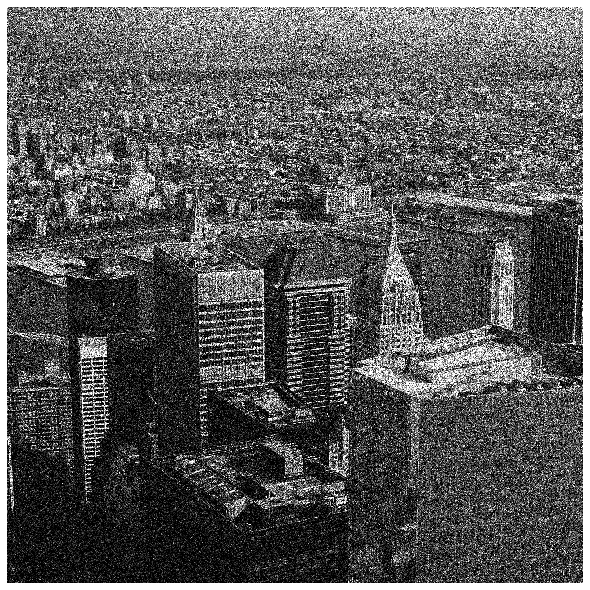

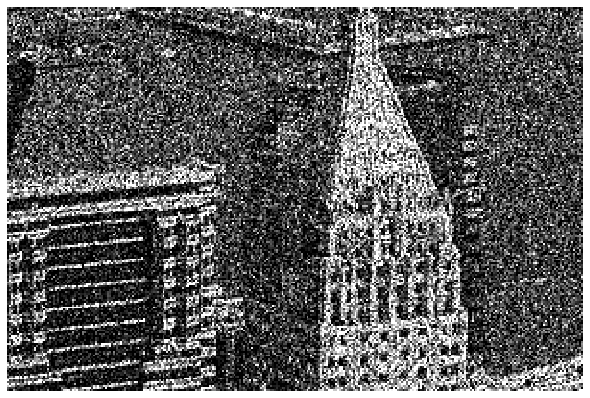

In [28]:
microshow(noisy_image, fig_scaling=8)
microshow(noisy_image[400:600, 500:800], fig_scaling=8);

As you can see, it is quite corrupted by noise. To fix it, we will use the Butterworth filter, the default recommended method in Aydin. The Butterworth filters works on the frequency domain, trying to improve fine details in an image.

First we load a model, here the ```Classic``` one:

In [37]:
from aydin.restoration.denoise.classic import Classic

classic_restoration = Classic()

Then we need to "tune" the denoiser: based on image features it will try to estimate the best parameters to denoise the image. This is one of the main advantages of Aydin: few parameters have to be manually selected, removing this burden from the end-user:

In [38]:
noisy_image_crop = noisy_image[400:600, 500:800]

In [39]:
classic_restoration.train(noisy_image)

Callback for minimizer starting at [0.421875 0.140625]:
Callback for minimizer starting at [0.9921875 0.9921875]:


/Users/gw18g940/mambaforge/envs/micpy/lib/python3.9/site-packages/scipy/optimize/optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/Users/gw18g940/mambaforge/envs/micpy/lib/python3.9/site-packages/scipy/optimize/optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


Finally, now that our model is trained, we can use it on our image or any other similar image.

In [41]:
denoised_image = classic_restoration.denoise(noisy_image_crop)

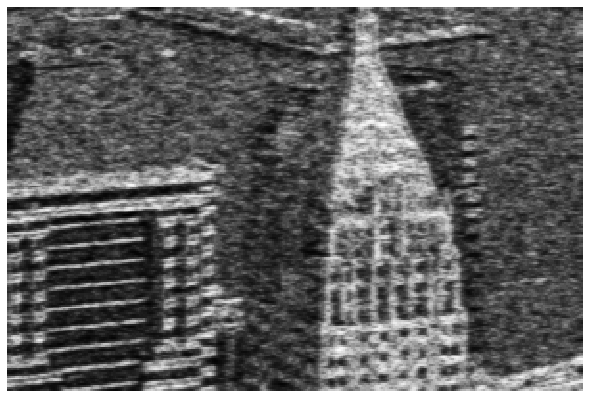

In [42]:
from microfilm.microplot import microshow

microshow(denoised_image, fig_scaling=8);

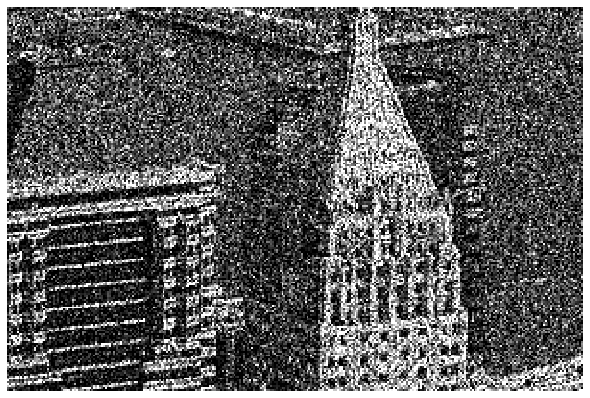

In [43]:
microshow(noisy_image_crop, fig_scaling=8);

The result is not perfect but already much better than the original.

## Pre-processing

In many cases, you may want to pre-process your data before actually denoising them. This can include very different steps such as:
- removing specific noise types such as Salt and Pepper noise
- correcting for background
- scaling your image
- etc.

As an example we apply two such transforms to our image before denoising: we fix its range between 0 and 1 and we pad it to avoid artefacts on the edges.

Let's see a single transform in action:

In [64]:
from aydin.it.transforms.padding import PaddingTransform

padding_tf = PaddingTransform()
transformed = padding_tf.preprocess(noisy_image_crop)

In [65]:
transformed.shape

(206, 306)

In [66]:
noisy_image_crop.shape

(200, 300)

Instead of successively calling these transforms we can create a sort of pipeline: 

In [67]:
transforms = [
     {"class": RangeTransform, "kwargs": {}},
     {"class": PaddingTransform, "kwargs": {}},
 ]
classic_restoration = Classic(it_transforms=transforms)
classic_restoration.train(noisy_image)
denoised_image = classic_restoration.denoise(noisy_image)

Callback for minimizer starting at [0.421875 0.140625]:
Callback for minimizer starting at [0.9921875 0.9921875]:
